Importamos librerias y definimos la ruta de la base de datos

In [1]:
import os
import pandas as pd
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta de la carpeta que contiene las imágenes
ruta_carpeta = '/home/waldos/Documents/2doCodigo/TopicoIA/Marzo/TareasMarzo/FinSemanaExamenFinal/AModificarNoTocar/Examenes/BD/corpus_images'



Recorremos toda la carpeta y hacemos una matriz con todos los datos de todas las imagenes

In [2]:
# Crear una lista para almacenar los datos de las imágenes
datos_imagen_recortada = {}
directorio = {'Imagen': [], 'Caracteristicas': [], 'Rostro': [], 'Etiqueta': []}
# Recorrer la carpeta para buscar archivos jpg
for carpeta_nombre in os.listdir(ruta_carpeta):
    carpeta_ruta = os.path.join(ruta_carpeta, carpeta_nombre)
    if os.path.isdir(carpeta_ruta):
        for archivo_nombre in os.listdir(carpeta_ruta):
            try:
                archivo_ruta = os.path.join(carpeta_ruta, archivo_nombre)
                    
                    # Cargar la imagen utilizando PIL (Pillow)
                #imagen = face_recognition.load_image_file(archivo_ruta)
                    
                    # Convertir la imagen a escala de grises
                imagen_gris = Image.open(archivo_ruta).convert('L')
                    
                    # Redimensionar la imagen a 150x150
                imagen_redimensionada = np.array(imagen_gris.resize((150, 150)))
                    # Expandir la dimensión para hacerla (224, 224, 1)
                imagen_redimensionada = np.expand_dims(imagen_redimensionada, axis=-1)

                # Obtener los landmarks faciales
                caracteristicas_faciales = face_recognition.face_landmarks(imagen_redimensionada)
                
                # Detectar los rostros en la imagen
                puntosX_YRostro = face_recognition.face_locations(imagen_redimensionada)

                #Recorta la cara
                puntos_ubicacion_cara = puntosX_YRostro[0]
                arriba, derecha, abajo, izquierda = puntos_ubicacion_cara
                cara_recortada = imagen_redimensionada[arriba:abajo, izquierda:derecha]
                
                # Agregar la información de la imagen al DataFrame
                #datos_imagen_recortada.append([imagen_redimensionada, caracteristicas,cara_recortada,carpeta_nombre])
                directorio['Imagen'].append(imagen_redimensionada)
                directorio['Caracteristicas'].append(caracteristicas_faciales)
                directorio['Rostro'].append(cara_recortada)
                directorio['Etiqueta'].append(carpeta_nombre)
                
            except Exception as e:
                print("Error en archivo:"+str(archivo_nombre)+":"+str(e))
print("Proceso terminado")

Error en archivo:228.jpeg:list index out of range
Error en archivo:251.jpeg:list index out of range
Error en archivo:192.jpeg:list index out of range
Error en archivo:243.jpeg:list index out of range
Error en archivo:240.jpeg:list index out of range
Error en archivo:241.jpeg:list index out of range
Error en archivo:222.jpeg:list index out of range
Error en archivo:255.jpeg:list index out of range
Error en archivo:239.jpeg:list index out of range
Error en archivo:230.jpeg:list index out of range
Error en archivo:231.jpeg:list index out of range
Error en archivo:234.jpeg:list index out of range
Error en archivo:242.jpeg:list index out of range
Error en archivo:229.jpeg:list index out of range
Error en archivo:226.jpeg:list index out of range
Error en archivo:223.jpeg:list index out of range
Error en archivo:225.jpeg:list index out of range
Error en archivo:208.jpeg:list index out of range
Error en archivo:212.jpeg:list index out of range
Error en archivo:233.jpeg:list index out of range


Transformamos los datos a un pandas

In [5]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)


In [6]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[160], [160], [160], [160], [160], [160], [1...","[{'chin': [(46, 79), (46, 87), (46, 94), (47, ...","[[[32], [39], [37], [34], [25], [23], [13], [1...",relaxed
1,"[[[174], [174], [174], [174], [175], [175], [1...","[{'chin': [(62, 46), (62, 53), (63, 59), (64, ...","[[[28], [21], [39], [66], [110], [143], [163],...",relaxed
2,"[[[158], [159], [159], [157], [158], [158], [1...","[{'chin': [(41, 78), (40, 86), (40, 94), (42, ...","[[[32], [23], [19], [23], [24], [25], [30], [5...",relaxed
3,"[[[159], [159], [159], [159], [159], [159], [1...","[{'chin': [(47, 78), (47, 86), (47, 94), (49, ...","[[[160], [161], [160], [158], [151], [150], [9...",relaxed
4,"[[[158], [158], [159], [158], [158], [158], [1...","[{'chin': [(45, 79), (45, 86), (46, 94), (47, ...","[[[81], [37], [31], [23], [17], [19], [21], [2...",relaxed


Transformamos la parte de caracteristicas de directorio a numpy array

In [7]:
def extraer_caracteristicas_faciales(caractetisticas_faciales_lista):
    """
    Toma los diccionarios almacenados en la columna Hitos faciales y elimina las keys,
    dejando solo las coordenadas de donde se encuentran los puntos faciales.
    """
    caracteristicas_array = []
    for caracteristicas in caractetisticas_faciales_lista:
        puntos_referencia = []
        for rasgo_facial in caracteristicas.keys():
            puntos_referencia.extend(caracteristicas[rasgo_facial])
        caracteristicas_array.append(puntos_referencia)
    return np.array(caracteristicas_array)

# Sobrescribir la columna 'Hitos faciales' con las coordenadas de hitos faciales
df['Caracteristicas'] = df['Caracteristicas'].apply(extraer_caracteristicas_faciales)

In [8]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[160], [160], [160], [160], [160], [160], [1...","[[[46, 79], [46, 87], [46, 94], [47, 102], [49...","[[[32], [39], [37], [34], [25], [23], [13], [1...",relaxed
1,"[[[174], [174], [174], [174], [175], [175], [1...","[[[62, 46], [62, 53], [63, 59], [64, 65], [66,...","[[[28], [21], [39], [66], [110], [143], [163],...",relaxed
2,"[[[158], [159], [159], [157], [158], [158], [1...","[[[41, 78], [40, 86], [40, 94], [42, 101], [44...","[[[32], [23], [19], [23], [24], [25], [30], [5...",relaxed
3,"[[[159], [159], [159], [159], [159], [159], [1...","[[[47, 78], [47, 86], [47, 94], [49, 102], [51...","[[[160], [161], [160], [158], [151], [150], [9...",relaxed
4,"[[[158], [158], [159], [158], [158], [158], [1...","[[[45, 79], [45, 86], [46, 94], [47, 101], [49...","[[[81], [37], [31], [23], [17], [19], [21], [2...",relaxed


In [11]:
print(df['Imagen'][0].shape)
print(df['Caracteristicas'][0].shape)
print(df['Rostro'][0].shape)

(150, 150, 1)
(1, 72, 2)
(51, 52, 1)


Conversion a JSON. Es muy pesado, por lo que pasamos de ello.

In [10]:
#df_imagenes_recortadas.to_json('test.csv')

In [11]:
#df_jason = pd.read_json('test.csv')
#df_jason.head()

Pickle es una buena opción. Este se usa para serializar objetos en Python. Lamentablemente su uso está únicamente destinado a Python

In [12]:
#df_imagenes_recortadas.to_pickle('test.pkl')

In [13]:
#df_pickle = pd.read_pickle('test.pkl')
#df_pickle.head()

HDF5 es una gran opción. Se usa para el manejo de datos y pueden utilizarlo otros lenguajes o programas como MATLAB y Java. Está destinado para manejo de grandes datos.

Instalar tables para usar hdf5

In [14]:
#pip install tables

In [12]:
df.to_hdf('BD_Emotions_Gray.h5', key='dataframe', mode='w')

/tmp/ipykernel_12646/1468557164.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Emotions_Gray.h5', key='dataframe', mode='w')


Leer el archivo creado

In [13]:
df_HDF = pd.read_hdf('BD_Emotions_Gray.h5')


In [14]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[[160], [160], [160], [160], [160], [160], [1...","[[[46, 79], [46, 87], [46, 94], [47, 102], [49...","[[[32], [39], [37], [34], [25], [23], [13], [1...",relaxed
1,"[[[174], [174], [174], [174], [175], [175], [1...","[[[62, 46], [62, 53], [63, 59], [64, 65], [66,...","[[[28], [21], [39], [66], [110], [143], [163],...",relaxed
2,"[[[158], [159], [159], [157], [158], [158], [1...","[[[41, 78], [40, 86], [40, 94], [42, 101], [44...","[[[32], [23], [19], [23], [24], [25], [30], [5...",relaxed
3,"[[[159], [159], [159], [159], [159], [159], [1...","[[[47, 78], [47, 86], [47, 94], [49, 102], [51...","[[[160], [161], [160], [158], [151], [150], [9...",relaxed
4,"[[[158], [158], [159], [158], [158], [158], [1...","[[[45, 79], [45, 86], [46, 94], [47, 101], [49...","[[[81], [37], [31], [23], [17], [19], [21], [2...",relaxed


Nuevamente visualizamos los datos para ver que si esten correctamente

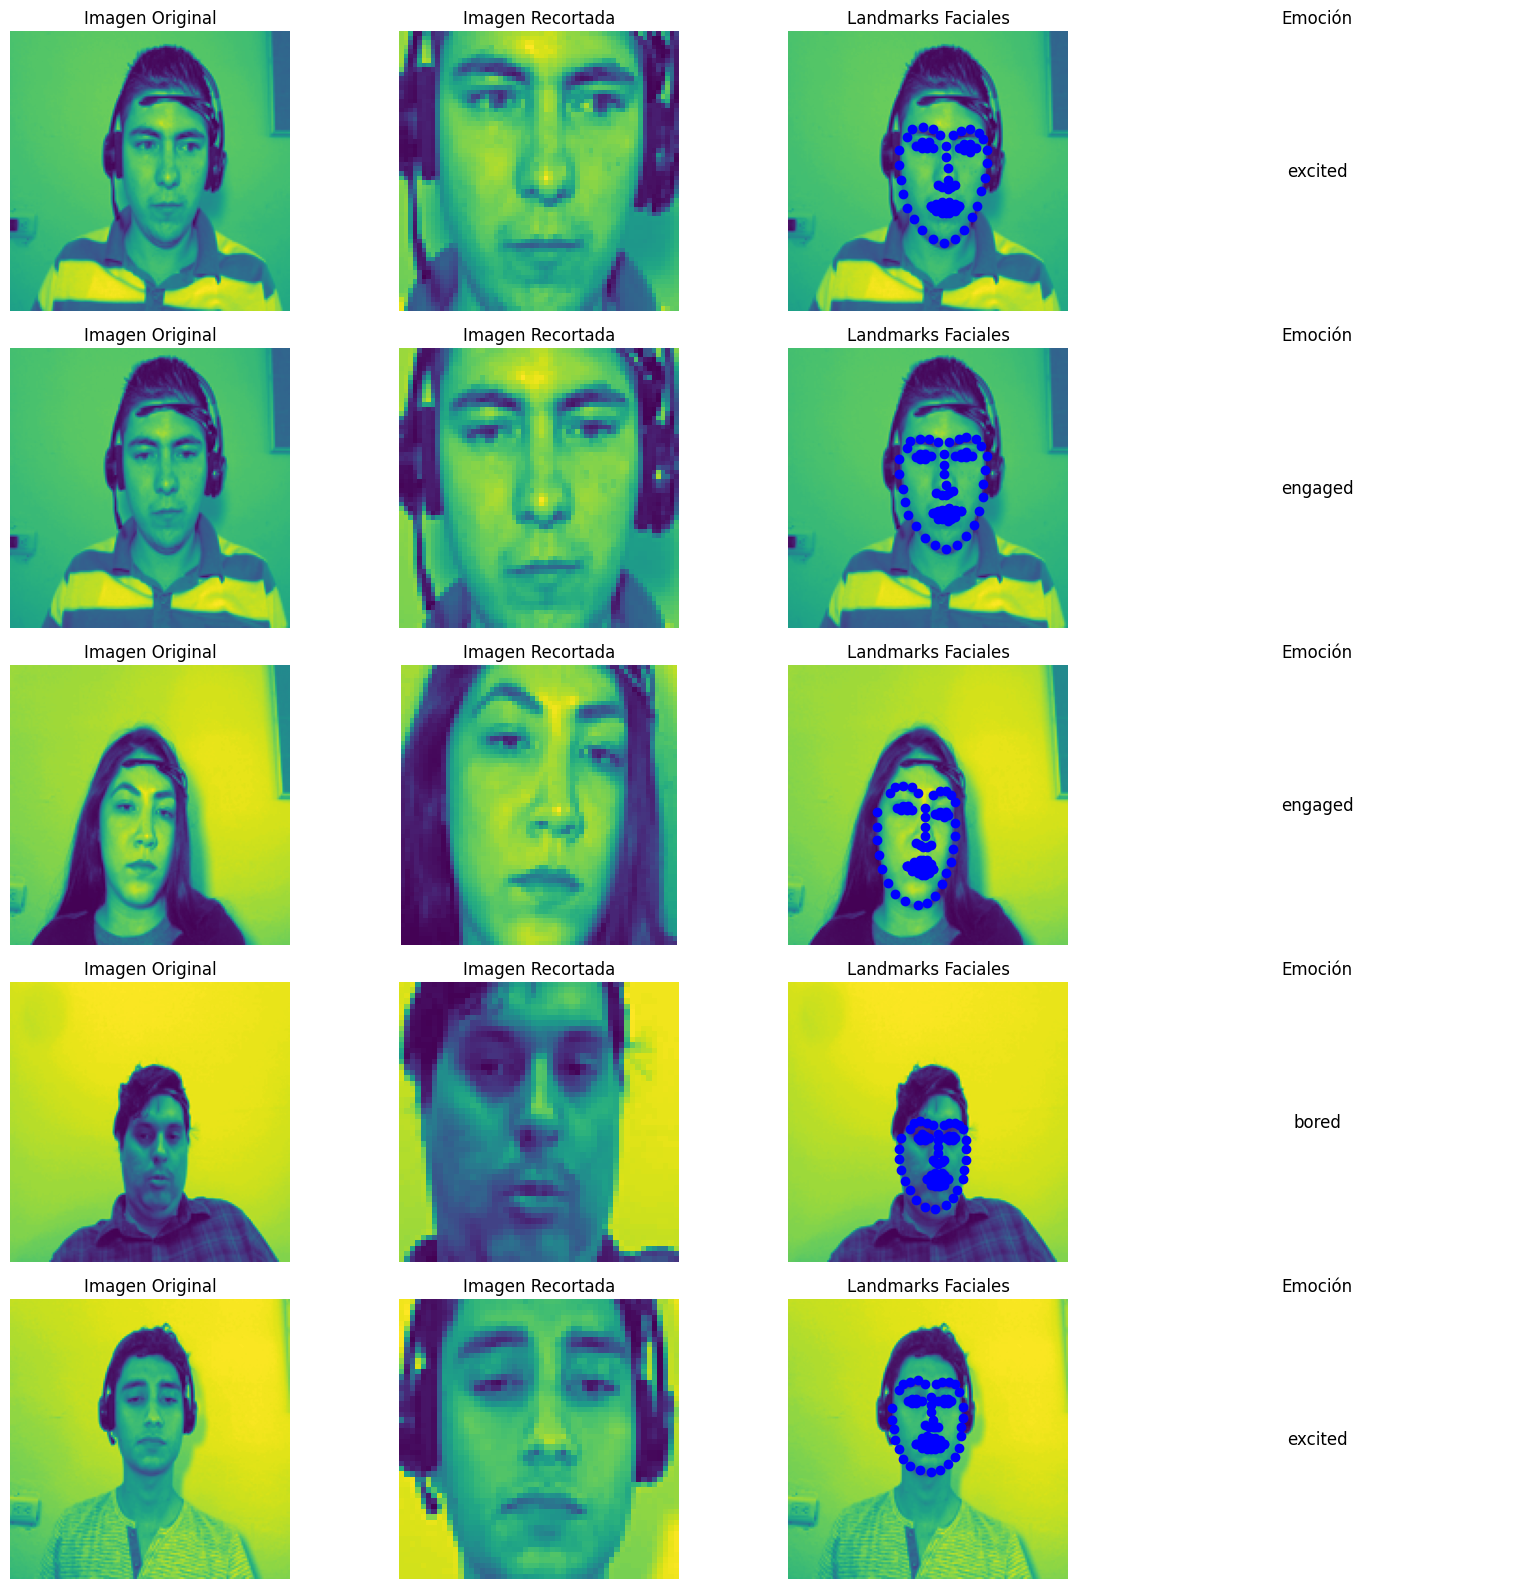

In [15]:
df_ejemploHDF = df_HDF.sample(n=5)

# Visualizar las imágenes seleccionadas con los rostros detectados y los landmarks faciales
fig, axes = plt.subplots(nrows=len(df_ejemploHDF), ncols=4, figsize=(16, 16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    # Subgráfico para la imagen original
    ax0 = axes[i, 0]
    ax0.imshow(row['Imagen'])
    ax0.set_title("Imagen Original")
    ax0.axis('off')
    
    # Subgráfico para la imagen recortada con el rostro detectado
    ax1 = axes[i, 1]
    imagen_recortada = row['Rostro']
    ax1.imshow(imagen_recortada)
    ax1.set_title("Imagen Recortada")
    ax1.axis('off')
    
    # Subgráfico para los landmarks faciales
    ax2 = axes[i, 2]
    ax2.imshow(row['Imagen'])

    for landmark in row['Caracteristicas']:
        for punto in landmark:
            ax2.plot(punto[0], punto[1], marker='o', markersize=6, color='blue')

    

    ax2.set_title("Landmarks Faciales")
    ax2.axis('off')
    
    # Subgráfico para la emoción (si está disponible)
    ax3 = axes[i, 3]
    # Aquí puedes agregar código para mostrar la emoción en lugar de un gráfico vacío
    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment='center', verticalalignment='center', fontsize=12)
    ax3.set_title("Emoción")
    ax3.axis('off')

plt.tight_layout()
plt.show()